In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb#

import pickle

plt.rcParams['figure.figsize'] = (14, 12)


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("data/chrun_modeling_fe.csv", index_col=[0])
X = df.drop("exited", axis=1)
y = df["exited"]
X.shape, y.shape

((10000, 13), (10000,))

In [59]:
def train_test(X,y, size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    return X_train, X_test, y_train, y_test

In [61]:
X_train, X_test, y_train, y_test = train_test(X,y, .20)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [5]:
def create_model(model, X_train, X_test, y_train, y_test):
    m = model
    m= m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    #print(accuracy_score(y_test, y_pred))
    return m

In [6]:
# create_model(LogisticRegression, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.69      0.36      0.48       393

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



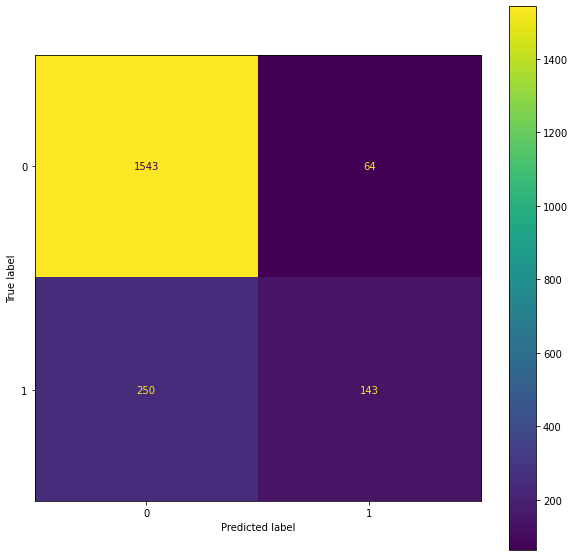

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_pred)

print(classification_report(y_test, y_pred))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, ax=ax);

## Hangling the imblance in the dataset

In [8]:
X_somte, y_smote = SMOTE().fit_resample(X,y)
print(y_smote.value_counts())

X_adasyn, y_adasyn = ADASYN().fit_resample(X,y)
print(y_adasyn.value_counts())

X_somteto, y_smoteto = SMOTETomek().fit_resample(X,y)
print(y_smoteto.value_counts())

X_somteenn, y_smoteenn = SMOTEENN().fit_resample(X,y)
print(y_smoteenn.value_counts())



1    7963
0    7963
Name: exited, dtype: int64
1    7977
0    7963
Name: exited, dtype: int64
1    6884
0    6884
Name: exited, dtype: int64
1    3625
0    2891
Name: exited, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_somte, y_smote, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1633
           1       0.81      0.84      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



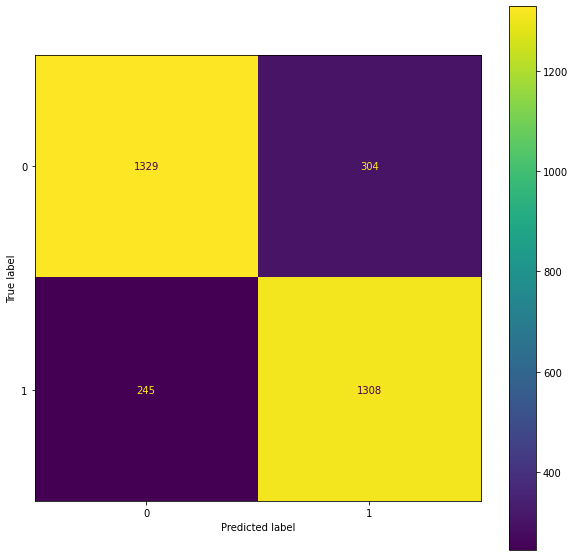

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_1 = lr.predict(X_test)

lr.score(X_test, y_pred_1)

print(classification_report(y_test, y_pred_1))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr, X_test, y_test, ax=ax);

## SVM

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1633
           1       0.84      0.85      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



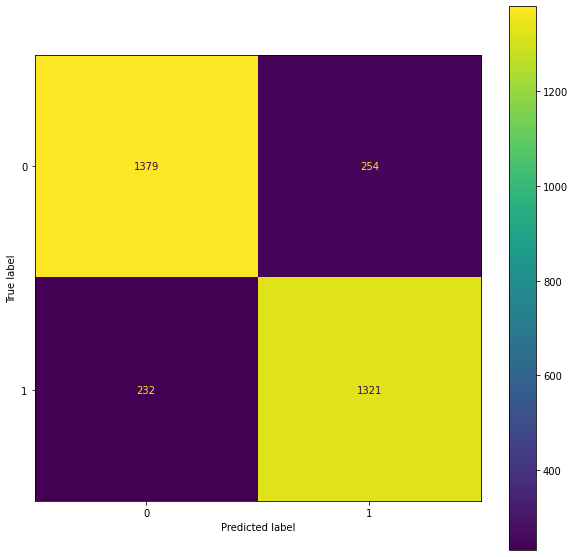

In [20]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred_2 = svm.predict(X_test)

svm.score(X_test, y_pred_2)

print(classification_report(y_test, y_pred_2))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm, X_test, y_test, ax=ax);

# KNeighbors

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1633
           1       0.83      0.87      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



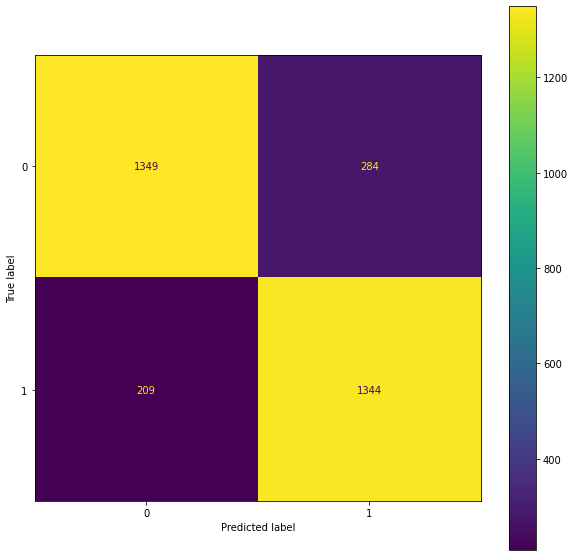

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_3 = knn.predict(X_test)

knn.score(X_test, y_pred_3)

print(classification_report(y_test, y_pred_3))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, X_test, y_test, ax=ax);

# Decision Tree

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1633
           1       0.83      0.87      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



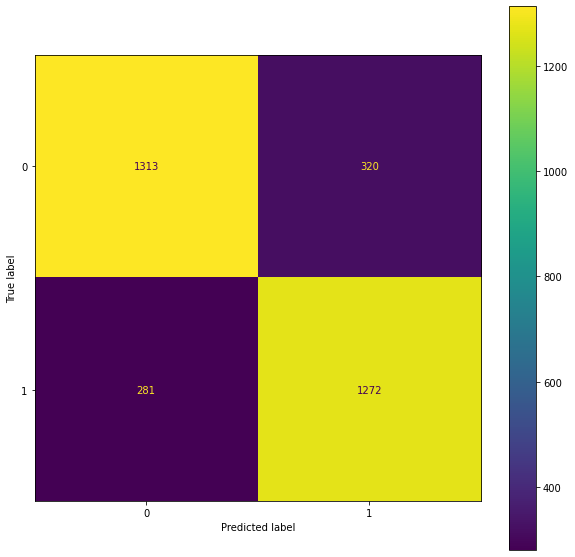

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_4 = dt.predict(X_test)

dt.score(X_test, y_pred_3)

print(classification_report(y_test, y_pred_3))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt, X_test, y_test, ax=ax);

## Random Forrest

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1633
           1       0.83      0.87      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



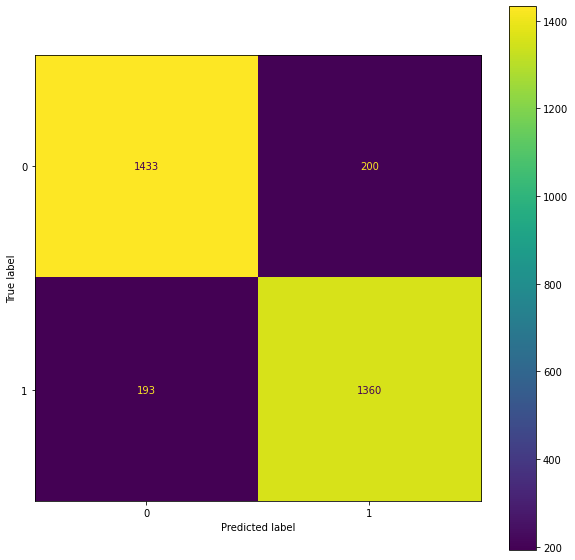

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_5 = rf.predict(X_test)

rf.score(X_test, y_pred_3)

print(classification_report(y_test, y_pred_3))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf, X_test, y_test, ax=ax);

# Gradiant Boosting

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1633
           1       0.83      0.87      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



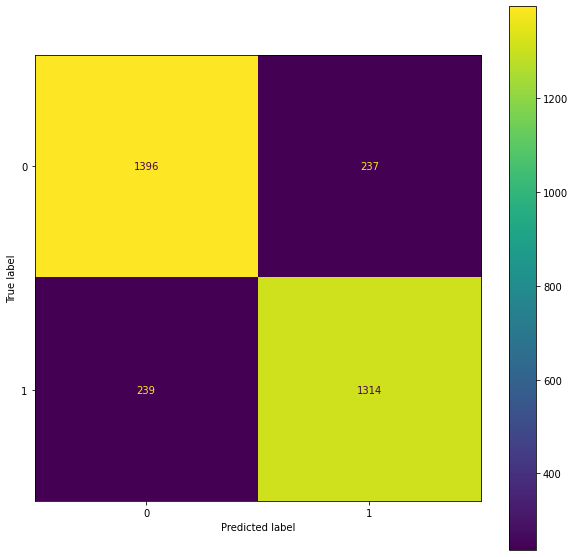

In [25]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_6 = gb.predict(X_test)

gb.score(X_test, y_pred_3)

print(classification_report(y_test, y_pred_3))


__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb, X_test, y_test, ax=ax);

# Comparison between the models

In [46]:
compare_df = pd.DataFrame(
    {"models": ["lr", "svm", "knn", "dt", "rf", "gb"],
    "accuracy": [accuracy_score(y_test, y_pred_1),
           accuracy_score(y_test, y_pred_2),
           accuracy_score(y_test, y_pred_3),
           accuracy_score(y_test, y_pred_4),
           accuracy_score(y_test, y_pred_5),
           accuracy_score(y_test, y_pred_6)], 
    "precision_score": [precision_score(y_test, y_pred_1),
           precision_score(y_test, y_pred_2),
           precision_score(y_test, y_pred_3),
           precision_score(y_test, y_pred_4),
           precision_score(y_test, y_pred_5),
           precision_score(y_test, y_pred_6)],
     "f1_score": [f1_score(y_test, y_pred_1),
           f1_score(y_test, y_pred_2),
           f1_score(y_test, y_pred_3),
           f1_score(y_test, y_pred_4),
           f1_score(y_test, y_pred_5),
           f1_score(y_test, y_pred_6)],
       "recall_score": [recall_score(y_test, y_pred_1),
           recall_score(y_test, y_pred_2),
           recall_score(y_test, y_pred_3),
           recall_score(y_test, y_pred_4),
           recall_score(y_test, y_pred_5),
           recall_score(y_test, y_pred_6)]
           })

In [47]:
compare_df

,models,accuracy,precision_score,f1_score,recall_score
0,lr,0.827684,0.811414,0.826540,0.842241
1,svm,0.847458,0.838730,0.844629,0.850612
2,knn,0.845261,0.825553,0.845017,0.865422
3,dt,0.811362,0.798995,0.808903,0.819060
4,rf,0.876648,0.871795,0.873755,0.875724
5,gb,0.850596,0.847195,0.846649,0.846104


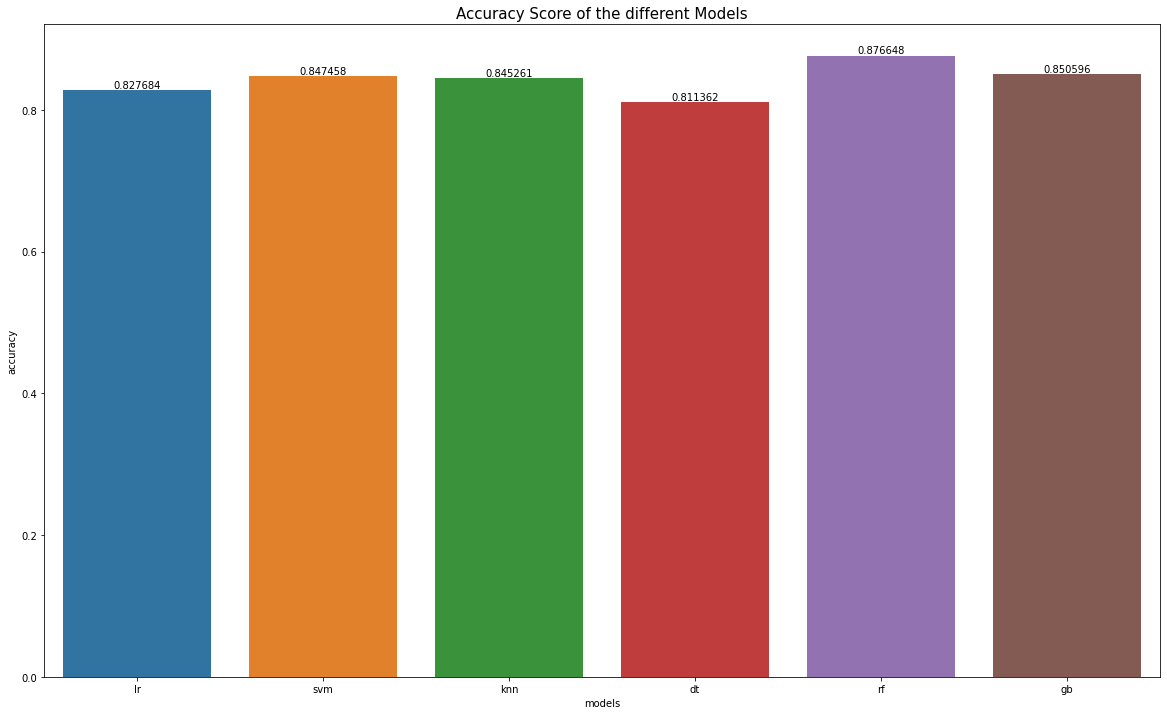

In [58]:
plt.figure(figsize=(20,12))
ax = sns.barplot(compare_df.models, compare_df.accuracy)
plt.title("Accuracy Score of the different Models", fontdict={"fontsize": 15})
ax.bar_label(ax.containers[0]);
